# 의사결정나무_분류

In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd

# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz
from sklearn.tree import export_graphviz

# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가
from sklearn.metrics import confusion_matrix

In [2]:
df_raw = pd.read_csv("./유방암.csv", engine = "python")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#결측치 확인
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [4]:
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# 목표 변수, 설명변수 데이터 지정
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)

In [6]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.6, random_state = 1234)

df_validation_x, df_test_x, df_validation_y, df_test_y = train_test_split(df_test_x, df_test_y
                                                               , test_size = 0.5, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))

print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y .shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [7]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on validation set: {:.3f}".format(tree_uncustomized.score(df_validation_x, df_validation_y)))

Score on training set: 1.000
Score on validation set: 0.895


In [8]:
# train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth * 1 for depth in range(1,11)] #참조: para_depth: [1,2,3,...,10]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth= v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_validation_x, df_validation_y))
    
# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainScore"] = train_accuracy
df_accuracy_depth["ValidationScore"] = test_accuracy

In [9]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on validation set: {:.3f}".format(tree_uncustomized.score(df_validation_x, df_validation_y)))

Score on training set: 1.000
Score on validation set: 0.895


In [10]:
tree_uncustomized

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [11]:
# train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth * 1 for depth in range(1,11)] #참조: para_depth: [1,2,3,...,10]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth= v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_validation_x, df_validation_y))
    
# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainScore"] = train_accuracy
df_accuracy_depth["ValidationScore"] = test_accuracy

In [12]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainScore,ValidationScore
0,1,0.943,0.895
1,2,0.965,0.930
2,3,0.987,0.942
3,4,1.000,0.895
4,5,1.000,0.895
5,6,1.000,0.895
6,7,1.000,0.895
7,8,1.000,0.895
8,9,1.000,0.895
9,10,1.000,0.895


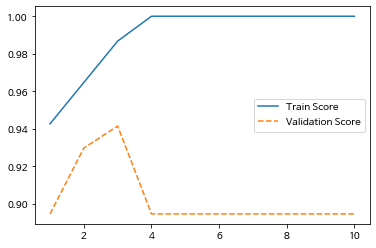

In [13]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Validation Score")
plt.legend()

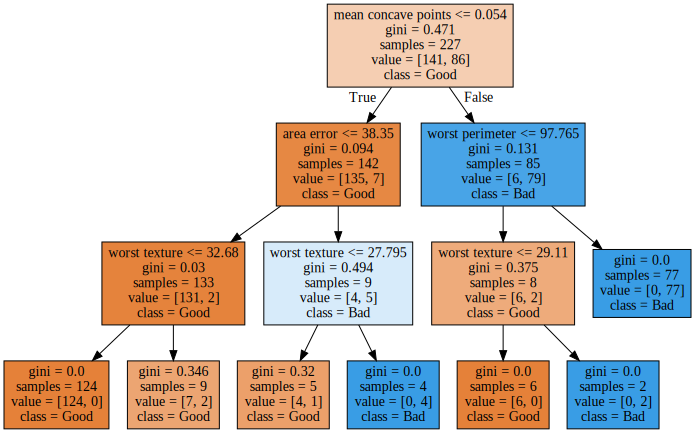

In [14]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 깊이가 4인 모델
tree_low = DecisionTreeClassifier(max_depth = 3, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
# 트리 모델을 tree_low.dot 파일로 저장. (목표변수, 0: Good, 1: Bad)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names= v_feature_name, impurity=True, filled=True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [15]:
# train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy = []
# min_samples_split: 분리노드의 최소 자료수
para_split = [n_split*10 for n_split in range(1,11)]  # 참조: para_split: [10,20,30,...,100]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 3,random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_validation_x, df_validation_y))
    
# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainScore"] = train_accuracy
df_accuracy_split["ValidationScore"] = test_accuracy

In [16]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainScore,ValidationScore
0,10,0.965,0.930
1,20,0.965,0.930
2,30,0.965,0.930
3,40,0.965,0.930
4,50,0.965,0.930
5,60,0.965,0.930
6,70,0.965,0.930
7,80,0.965,0.930
8,90,0.947,0.906
9,100,0.947,0.906


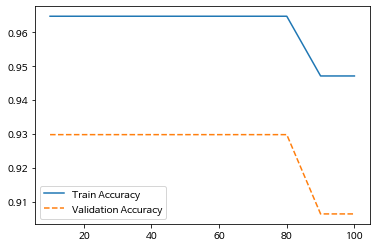

In [17]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Validation Accuracy")
plt.legend()

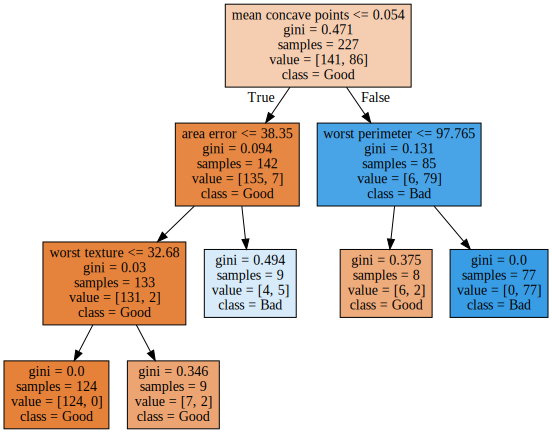

In [18]:
# 분리 노드의 최소 자료 수가 20인 모델
tree_low = DecisionTreeClassifier(max_depth = 3, min_samples_split = 80, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [19]:
# train 및 test 설명력 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분리노드의 최소 자료수 제한
para_leaf = [n_split for n_split in range(1,11)]  # 참조: para_leaf: [2,4,6,...,20]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=v_min_samples_leaf, min_samples_split = 80, \
                                 max_depth = 3,random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_validation_x, df_validation_y))
    
# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesSplit"] = para_leaf
df_accuracy_leaf["TrainScore"] = train_accuracy
df_accuracy_leaf["ValidationScore"] = test_accuracy

In [20]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesSplit,TrainScore,ValidationScore
0,1,0.965,0.930
1,2,0.965,0.930
2,3,0.965,0.930
3,4,0.965,0.930
4,5,0.965,0.930
5,6,0.965,0.930
6,7,0.965,0.930
7,8,0.965,0.930
8,9,0.960,0.936
9,10,0.952,0.906


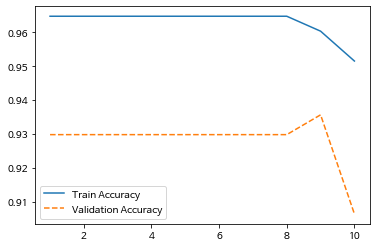

In [21]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Validation Accuracy")
plt.legend()

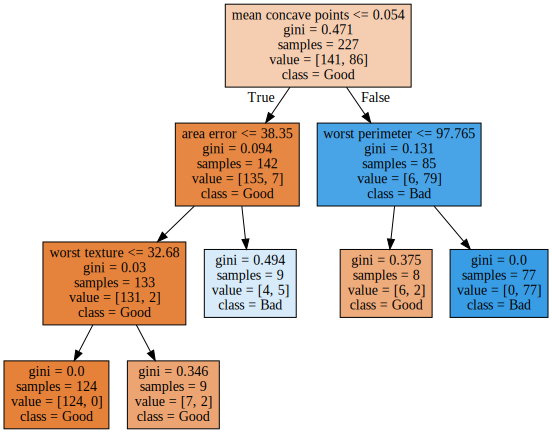

In [22]:
# 잎사귀의 최소 자료 수가 8인 모델
tree_low = DecisionTreeClassifier(max_depth = 3, min_samples_split = 80, min_samples_leaf = 8, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names= v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [23]:
tree_final = DecisionTreeClassifier(max_depth = 3, min_samples_split = 80, min_samples_leaf = 8, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=80,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

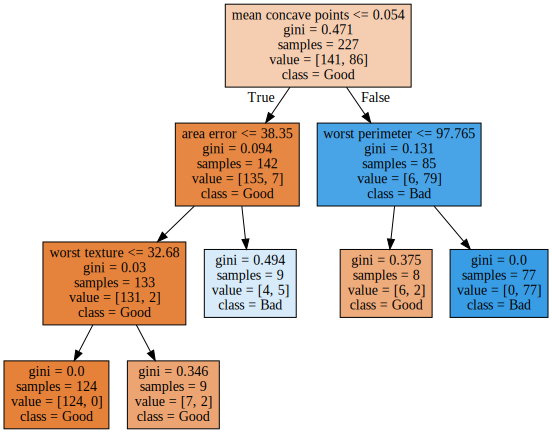

In [24]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["Good", "Bad"],
               feature_names= v_feature_name, impurity = True, filled = True)

# tree_final.dot 그리기
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [25]:
df_raw.describe()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [26]:
# 평가
y_pred = tree_final.predict(df_test_x)

# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int)

print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confustion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred_class)))

Accuracy: 0.895

Confustion matrix: 
[[92 10]
 [ 8 61]]


In [27]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# feature_importances의 테이블 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,mean concave points,0.856
22,worst perimeter,0.085
13,area error,0.051
21,worst texture,0.009
0,mean radius,0.000
16,concavity error,0.000
28,worst symmetry,0.000
27,worst concave points,0.000
26,worst concavity,0.000
25,worst compactness,0.000


Text(0, 0.5, '설명변수')

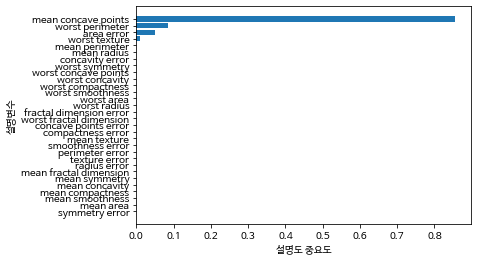

In [28]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림.
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명도 중요도")
plt.ylabel("설명변수")

In [54]:
estimator = DecisionTreeClassifier()
# 구하고자 하느 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, 
              "min_samples_leaf": para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

best parameter: 
{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 20}

best score: 
0.938


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# 랜덤포레스트_분류

In [29]:
# 기본 옵션으로 모델 생성
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

#train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

#validation 데이터 정확도
print("Accuracy on validation set: {:.3f}".format(rf_uncustomized.score(df_validation_x, df_validation_y)))

Accuracy on training set: 0.996
Accuracy on validation set: 0.930


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
rf_uncustomized

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [31]:
# 모델 parameter 조정 n_extimators : 트리수 변경에 따른 모델 성능

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy=[]
#n_estimators : 트리수 변경: 1~150
para_n_tree = [n_tree*10 for n_tree in range(1,16)] # *참조: para_n_tree [10,20,30,...,150]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))

# 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["ValidationAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,ValidationAccuracy
0,10,0.996,0.930
1,20,1.000,0.947
2,30,1.000,0.930
3,40,1.000,0.936
4,50,1.000,0.936
5,60,1.000,0.947
6,70,1.000,0.947
7,80,1.000,0.947
8,90,1.000,0.947
9,100,1.000,0.947


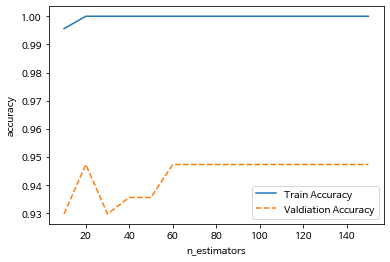

In [32]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Valdiation Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

In [33]:
#error 저장 리스트
oob_error = []

for v_n_estimator in range(1, 151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not hav

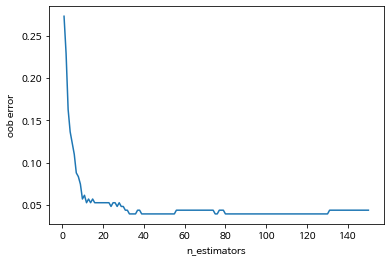

In [34]:
#그래프로 표현
plt.plot(range(1,151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

#트리 수 지정
n_estimators = 100

In [35]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy=[]
# max_depth: 최대 깊이 변경 
para_depth = [depth for depth in range(1,11)] # *참조: para_depth: [1,2,3,...,10]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth , n_estimators = 60, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["ValidationAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,ValidationAccuracy
0,10,0.996,0.930
1,20,1.000,0.947
2,30,1.000,0.930
3,40,1.000,0.936
4,50,1.000,0.936
5,60,1.000,0.947
6,70,1.000,0.947
7,80,1.000,0.947
8,90,1.000,0.947
9,100,1.000,0.947


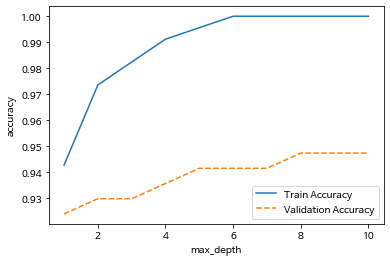

In [36]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Validation Accuracy")
plt.xlabel("max_depth"); plt.ylabel("accuracy")
plt.legend()

#최대 깊이 지정
max_depth = 4

In [45]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy=[]
# min_sample_split:분리 노드의 최소 자료 수
para_split = [n_split*10 for n_split in range(1,11)] #

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth = 5 , n_estimators = 60, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["ValidationAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidationAccuracy
0,10,0.987,0.936
1,20,0.982,0.942
2,30,0.982,0.942
3,40,0.978,0.942
4,50,0.974,0.942
5,60,0.978,0.942
6,70,0.978,0.942
7,80,0.978,0.942
8,90,0.974,0.942
9,100,0.960,0.942


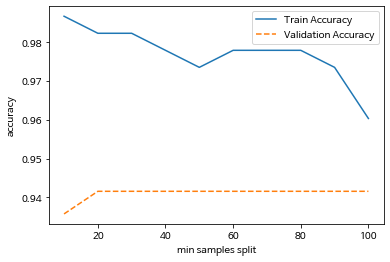

In [46]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Validation Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

In [47]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy=[]
# min_sample_split:분리 노드의 최소 자료 수
para_leaf = [n_leaf*10 for n_leaf in range(1,11)] 

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, 
                                max_depth = 4 , n_estimators = 60, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesleaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["ValidationAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesleaf,TrainAccuracy,ValidationAccuracy
0,10,0.965,0.947
1,20,0.960,0.953
2,30,0.960,0.953
3,40,0.960,0.936
4,50,0.965,0.912
5,60,0.930,0.924
6,70,0.930,0.924
7,80,0.621,0.667
8,90,0.621,0.667
9,100,0.621,0.667


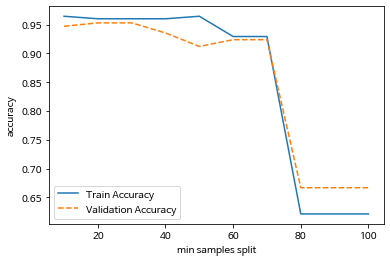

In [48]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Validation Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

In [49]:
#최종모델
rf_final = RandomForestClassifier(min_samples_leaf=70, max_depth = 3, n_estimators = 60, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
#평가
y_pred = rf_final.predict(df_test_x)

#train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(rf_final.score(df_train_x, df_train_y)))
#test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
#confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.930

Accuracy on test set: 0.854

Confusion matrix: 
[[87 15]
 [10 59]]


In [50]:
#변수명
v_feature_name = df_train_x.columns

# tree.teature_importances_로 설명 변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = rf_final.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,importance
0,mean radius,0.146
22,worst perimeter,0.146
7,mean concave points,0.125
23,worst area,0.104
20,worst radius,0.104
27,worst concave points,0.083
2,mean perimeter,0.083
6,mean concavity,0.042
3,mean area,0.042
13,area error,0.042


Text(0, 0.5, 'variables')

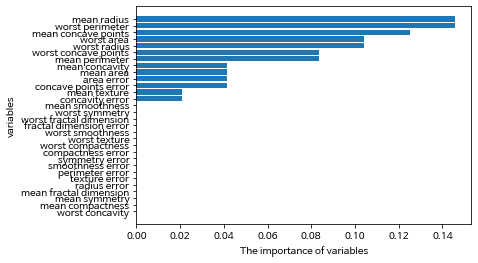

In [51]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림.
df_importance.sort_values("importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("The importance of variables")
plt.ylabel("variables")

In [52]:
estimator = RandomForestClassifier(n_estimators=100, random_state=1234)
#구하고자 하는 parameter와 범위
param_grid = {"max_depth":para_depth, "min_samples_leaf":para_leaf}

#정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

best parameter:
{'max_depth': 3, 'min_samples_leaf': 10}

best score:
0.96
